In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Matplotlib styles

In [235]:
plt.style.use(["classic", "seaborn"])

# Graduates of the Bolivarian University of Venezuela 2006 - 2017

In this jupyter-notebook we seek to make an exploratory data analysis where with the data set provided by the web page ['datos.gob.ve'][1] we will carry out a small study of the students who graduated from the Bolivarian University of Venezuela in the period between 2006 - 2017.

It should be noted that this study is for purely educational purposes to develop the ability to analyze data with python.

[1]: http://www.datos.gob.ve/dataset/egresados-universidad-bolivariana-de-venezuela

## First look at the data

In [236]:
data_path = os.path.abspath("../data")
graduates2006_2017 = pd.read_csv(f"{data_path}/graduates_UBV_2006_2017.csv")

/tmp/ipykernel_3761/2056919262.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  graduates2006_2017 = pd.read_csv(f"{data_path}/graduates_UBV_2006_2017.csv")


After the union of the data in a single DataFrame in the 'data_union.ipynb' notebook we take a quick look at the product of that process with which we can see a couple of problems that we must solve first:

1. The row of Features is repeated twice.
2. We have a column 'Named: 0' that repeats the index of the DataFrame.

In addition to these two problems, we must do a more exhaustive cleaning, however, we will start first with the two previous points.

In [237]:
graduates2006_2017

,Unnamed: 0,NACIONALIDAD,NOMBRES,APELLIDOS,ESTADO,CAPITAL,CÓDIGO,TITULO,AÑO DE EGRESO,TIPO ALDEA,COHORTE,GRADO ACADÉMCO,MENCIÓN
0,0,NACIONALIDAD,NOMBRES,APELLIDOS,ESTADO,CAPITAL,0,TITULO,AÑO DE EGRESO,NaN,COHORTE,GRADO ACADÉMCO,MENCIÓN
1,1,VENEZOLANA,DELGADO DE ALVAREZ,GLADYS DE LA CRUZ,GUARICO,SAN JUAN DE LOS MORROS,GSO,LICENCIADO EN GESTION SOCIAL DEL DESARROLLO,2016,NaN,NaN,NaN,NaN
2,2,VENEZOLANA,JIMENEZ JIMENEZ,MAYERLING NATHALI,DISTRITO CAPITAL,CARACAS,CSO,PRODUCCION DE MEDIOS,2016,NaN,NaN,NaN,NaN
3,3,VENEZOLANA,JIMENEZ JIMENEZ,MAYERLING NATHALI,DISTRITO CAPITAL,CARACAS,CSO,PRODUCCION MEDIOS DE,2016,NaN,NaN,NaN,NaN
4,4,VENEZOLANA,ARVELAIZ DE AVILA,MARIA DE LOS SANTOS,GUARICO,SAN JUAN DE LOS MORROS,GSO,LICENCIADO EN GESTION SOCIAL DEL DESARROLLO,2016,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
428305,428305,VENEZOLANA,RIVERO RANGEL,JIMI ENDRI,ZULIA,MARACAIBO,INF,INFORMATICA PARA LA GESTION SOCIAL,2008,SEDE,2009-I,TSU,S/M
428306,428306,VENEZOLANA,SEMPRUM CALDERA,NEOMAR SEGUNDO,ZULIA,MARACAIBO,INF,INFORMATICA PARA LA GESTION SOCIAL,2008,SEDE,2009-I,TSU,S/M
428307,428307,VENEZOLANA,SUAREZ PEREZ,JAVIER ENRIQUE,ZULIA,MARACAIBO,INF,INFORMATICA PARA LA GESTION SOCIAL,2008,SEDE,2009-I,TSU,S/M
428308,428308,VENEZOLANA,VERA,KENDRI JOSE,ZULIA,MARACAIBO,INF,INFORMATICA PARA LA GESTION SOCIAL,2008,SEDE,2009-I,TSU,S/M


### Fixed Header Row left over

In [238]:
graduates2006_2017.drop(index=0, axis=0, inplace=True)
graduates2006_2017

,Unnamed: 0,NACIONALIDAD,NOMBRES,APELLIDOS,ESTADO,CAPITAL,CÓDIGO,TITULO,AÑO DE EGRESO,TIPO ALDEA,COHORTE,GRADO ACADÉMCO,MENCIÓN
1,1,VENEZOLANA,DELGADO DE ALVAREZ,GLADYS DE LA CRUZ,GUARICO,SAN JUAN DE LOS MORROS,GSO,LICENCIADO EN GESTION SOCIAL DEL DESARROLLO,2016,NaN,NaN,NaN,NaN
2,2,VENEZOLANA,JIMENEZ JIMENEZ,MAYERLING NATHALI,DISTRITO CAPITAL,CARACAS,CSO,PRODUCCION DE MEDIOS,2016,NaN,NaN,NaN,NaN
3,3,VENEZOLANA,JIMENEZ JIMENEZ,MAYERLING NATHALI,DISTRITO CAPITAL,CARACAS,CSO,PRODUCCION MEDIOS DE,2016,NaN,NaN,NaN,NaN
4,4,VENEZOLANA,ARVELAIZ DE AVILA,MARIA DE LOS SANTOS,GUARICO,SAN JUAN DE LOS MORROS,GSO,LICENCIADO EN GESTION SOCIAL DEL DESARROLLO,2016,NaN,NaN,NaN,NaN
5,5,VENEZOLANA,BLANCO DE CARRILLO,CELINA MERCEDES,GUARICO,SAN JUAN DE LOS MORROS,GSO,LICENCIADO EN GESTION SOCIAL DEL DESARROLLO,2016,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
428305,428305,VENEZOLANA,RIVERO RANGEL,JIMI ENDRI,ZULIA,MARACAIBO,INF,INFORMATICA PARA LA GESTION SOCIAL,2008,SEDE,2009-I,TSU,S/M
428306,428306,VENEZOLANA,SEMPRUM CALDERA,NEOMAR SEGUNDO,ZULIA,MARACAIBO,INF,INFORMATICA PARA LA GESTION SOCIAL,2008,SEDE,2009-I,TSU,S/M
428307,428307,VENEZOLANA,SUAREZ PEREZ,JAVIER ENRIQUE,ZULIA,MARACAIBO,INF,INFORMATICA PARA LA GESTION SOCIAL,2008,SEDE,2009-I,TSU,S/M
428308,428308,VENEZOLANA,VERA,KENDRI JOSE,ZULIA,MARACAIBO,INF,INFORMATICA PARA LA GESTION SOCIAL,2008,SEDE,2009-I,TSU,S/M


### We fixed the leftover index column

In [239]:
graduates2006_2017.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
graduates2006_2017

,NACIONALIDAD,NOMBRES,APELLIDOS,ESTADO,CAPITAL,CÓDIGO,TITULO,AÑO DE EGRESO,TIPO ALDEA,COHORTE,GRADO ACADÉMCO,MENCIÓN
1,VENEZOLANA,DELGADO DE ALVAREZ,GLADYS DE LA CRUZ,GUARICO,SAN JUAN DE LOS MORROS,GSO,LICENCIADO EN GESTION SOCIAL DEL DESARROLLO,2016,NaN,NaN,NaN,NaN
2,VENEZOLANA,JIMENEZ JIMENEZ,MAYERLING NATHALI,DISTRITO CAPITAL,CARACAS,CSO,PRODUCCION DE MEDIOS,2016,NaN,NaN,NaN,NaN
3,VENEZOLANA,JIMENEZ JIMENEZ,MAYERLING NATHALI,DISTRITO CAPITAL,CARACAS,CSO,PRODUCCION MEDIOS DE,2016,NaN,NaN,NaN,NaN
4,VENEZOLANA,ARVELAIZ DE AVILA,MARIA DE LOS SANTOS,GUARICO,SAN JUAN DE LOS MORROS,GSO,LICENCIADO EN GESTION SOCIAL DEL DESARROLLO,2016,NaN,NaN,NaN,NaN
5,VENEZOLANA,BLANCO DE CARRILLO,CELINA MERCEDES,GUARICO,SAN JUAN DE LOS MORROS,GSO,LICENCIADO EN GESTION SOCIAL DEL DESARROLLO,2016,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
428305,VENEZOLANA,RIVERO RANGEL,JIMI ENDRI,ZULIA,MARACAIBO,INF,INFORMATICA PARA LA GESTION SOCIAL,2008,SEDE,2009-I,TSU,S/M
428306,VENEZOLANA,SEMPRUM CALDERA,NEOMAR SEGUNDO,ZULIA,MARACAIBO,INF,INFORMATICA PARA LA GESTION SOCIAL,2008,SEDE,2009-I,TSU,S/M
428307,VENEZOLANA,SUAREZ PEREZ,JAVIER ENRIQUE,ZULIA,MARACAIBO,INF,INFORMATICA PARA LA GESTION SOCIAL,2008,SEDE,2009-I,TSU,S/M
428308,VENEZOLANA,VERA,KENDRI JOSE,ZULIA,MARACAIBO,INF,INFORMATICA PARA LA GESTION SOCIAL,2008,SEDE,2009-I,TSU,S/M


## Superficial data analysis

With the data a little better structured, it is time to see superficially what data we are working with, what its nature is, and try to identify if we should continue correcting inconsistencies in our DataFrame before proceeding to the exhaustive analysis of the data.

### DataFrame Dimension

In [240]:
graduates2006_2017_dimension =  graduates2006_2017.shape

rows_number = graduates2006_2017_dimension[0]
columns_number = graduates2006_2017_dimension[1]

print(f"Total number of rows: {rows_number}")
print(f"Total number of columns: {columns_number}")

Total number of rows: 428309
Total number of columns: 12


Here we can quickly see what the dimensions of our data are, we see that we have 428,309 observations which have 12 features.

Now let's explore the topic of Features a little more to see what conclusions we can draw from them.

### DataFrame Features

In [241]:
for feature in graduates2006_2017.columns:
  print(feature)

NACIONALIDAD
NOMBRES
APELLIDOS
ESTADO
CAPITAL
CÓDIGO
TITULO
AÑO DE EGRESO
TIPO ALDEA
COHORTE
GRADO ACADÉMCO
MENCIÓN


After passing all the features through a for loop we can see the name of each one of them and thus have an idea of what type of data each one will be dealing with and how we can use these fields to dig more into the data later.

One more observation that is worth noting is that since the language of these data was originally Spanish, they contain letters with accents which could end up causing future problems, we take note of this to correct it later.

In [242]:
graduates2006_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428309 entries, 1 to 428309
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   NACIONALIDAD    428309 non-null  object
 1   NOMBRES         428272 non-null  object
 2   APELLIDOS       428305 non-null  object
 3   ESTADO          428308 non-null  object
 4   CAPITAL         426649 non-null  object
 5   CÓDIGO          428307 non-null  object
 6   TITULO          428308 non-null  object
 7   AÑO DE EGRESO   428309 non-null  object
 8   TIPO ALDEA      428293 non-null  object
 9   COHORTE         428294 non-null  object
 10  GRADO ACADÉMCO  428283 non-null  object
 11  MENCIÓN         427085 non-null  object
dtypes: object(12)
memory usage: 39.2+ MB


Now we can see some interesting aspects of the Features of our DataFrame:
- All Features are of object type, this may mean that they are all categorical variables such as text.
- At first glance it can be seen that the Feature 'AÑO DE EGRESO', which represents the year in which the student graduated, should be a discrete numeric variable, this must be corrected and see if other problems of this type should be corrected in the other Features.
- In most of the Features we have missing data, being the only apparently complete Features 'NACIONALIDAD' and 'AÑO DE EGRESO'. Of course, this still has to be verified.

In [243]:
total_data_missing = 0

for feature in graduates2006_2017.columns:
  data_missing = graduates2006_2017[graduates2006_2017[feature].isna()].shape[0]
  total_data_missing = total_data_missing + data_missing
  print(f"Missing '{feature}' data: {data_missing}")

print(f"Total Data Missing: {total_data_missing}")

Missing 'NACIONALIDAD' data: 0
Missing 'NOMBRES' data: 37
Missing 'APELLIDOS' data: 4
Missing 'ESTADO' data: 1
Missing 'CAPITAL' data: 1660
Missing 'CÓDIGO' data: 2
Missing 'TITULO' data: 1
Missing 'AÑO DE EGRESO' data: 0
Missing 'TIPO ALDEA' data: 16
Missing 'COHORTE' data: 15
Missing 'GRADO ACADÉMCO' data: 26
Missing 'MENCIÓN' data: 1224
Total Data Missing: 2986


To further clarify the image, we can count how many data we are missing for each Feature, add all these and have an estimate of the missing data compared to the data we have to determine the impact of these missing data on our DataFrame.

We can also see that the Feature 'CAPITAL' and 'MENCIÓN' are the ones with the most missing data.

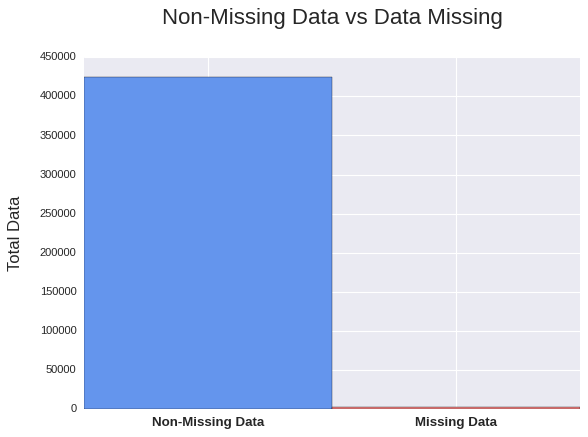

In [249]:
non_missing_data = graduates2006_2017.shape[0] - total_data_missing

fig, ax = plt.subplots()
ax.bar(["Non-Missing Data", "Missing Data"], [non_missing_data, total_data_missing], color=["cornflowerblue", "lightcoral"], width=1)
ax.set_title("Non-Missing Data vs Data Missing", fontsize=20, pad=30)
ax.set_ylabel("Total Data", fontsize=15, labelpad=15)
ax.set_xticks(np.arange(2), ["Non-Missing Data", "Missing Data"], fontsize=12, weight=800)
plt.show()

With a bar graph we can get a better idea of how little missing data we have compared to the non-missing data.

With this information we could decide if we eliminate these missing data and work only with the ones we have complete or on the other hand study this small set of missing data to see if we find something interesting.